# Pytorch Session 2: Linear regression

In [46]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Generation:


Let us create the following expressions:


$b=-1,w=2$

$\hat{y}=wx+b$


First, define the parameters:


torch.Size([20, 1]) torch.Size([20, 1])


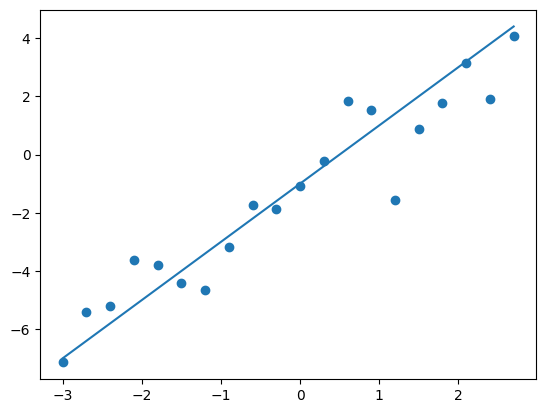

In [47]:
w0 = torch.tensor(2.0)
b0 = torch.tensor(-1.0)

torch.manual_seed(2021)
X = torch.arange(-3,3, 0.3).view(-1, 1)
f = w0*X+b0
print(X.shape, f.shape)

Y = f + torch.randn(f.shape)

import matplotlib.pyplot as plt
plt.scatter(X.numpy(),Y.numpy())
plt.plot(X.numpy(),f.numpy())

## 2. Linear regression model

You are given X and Y.

Your goal is to find the best linear model to explain the relation between X and Y by minimizing the following

$Loss(w, b)=\sum\limits_{i=1}^{n}(Y_i-Yhat_i)^2$

where

$Yhat_i:=X_i*w +b$.

In [48]:
 # Yhat을 만드는 함수, X.shape: (n,1), w.shape:(1,1) , b.shape (1,1)

def forward(x):
  return x*w+b

def loss_ftn(yhat, y):
  return torch.mean((yhat-y)**2)

torch.manual_seed(2023)
# w,b의 초기점
# w와 b는 param 1개이나, X*w를 할건데 이 차원이 [n,1]이 되도록 w를 [1,1]로 shape을 만들어줌
w = torch.tensor(torch.randn([1,1]), requires_grad=True)
b = torch.tensor(torch.randn([1,1]), requires_grad=True)

print(w,b)


# batch size없이 진행
history = []
lr = 0.1
epochs = 100

for _ in range(epochs):
    yhat =
    loss =

    # 미분
    loss.backward()

    #grad descent
    w.data =
    b.data =

    # 미분값 비워줌.
    w.grad = None
    b.grad = None

    history.append(loss.item())

plt.plot(history)

tensor([[-1.2075]], requires_grad=True) tensor([[0.5493]], requires_grad=True)


<ipython-input-48-681566fad60a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(torch.randn([1,1]), requires_grad=True)
<ipython-input-48-681566fad60a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.randn([1,1]), requires_grad=True)


In [49]:
print(w,b)

tensor([[1.7149]], requires_grad=True) tensor([[-1.1823]], requires_grad=True)


In [53]:
Yhat = forward(X)
train_MSE = loss_ftn(Yhat, Y)
train_MSE

tensor(0.9533, grad_fn=<MeanBackward0>)

In [54]:
print(w,b)

tensor([[1.7149]], requires_grad=True) tensor([[-1.1823]], requires_grad=True)


### 2.1 Further consideration:

`[1] Pytorch function of `model`: torch.nn.linear`

```
def model(x):
    return x @ beta
```
can be replaced by  
```
model = torch.nn.Linear(1, 1, bias=True)
```

`[2] torch.optim.SGD`

Using the following optimizer
`my_optimizer = torch.optim.SGD([w,b], lr=0.1)`, we can excute a gradient descent one time by the following command:

1> Gradient descent

`my_optimizer.step()`

which is equivalent with
` w.data = w.data-lr*w.grad.data`

`b.data = b.data-lr*b.grad.data`

2> Making zero-grad before differentiation

`my_optimizer.zero_grad()`

which is equivalent with

`w.grad = None`

`b.grad = None`

### Exercise 2.1.1

Train the same model above using `torch.optim.SGD` function.

In [55]:
def loss_ftn(yhat, y):
    return torch.mean( (y-yhat)**2)

#### 데이터 초기화 및 yhat 추정 모델 학습을 위한 optimizer 생성

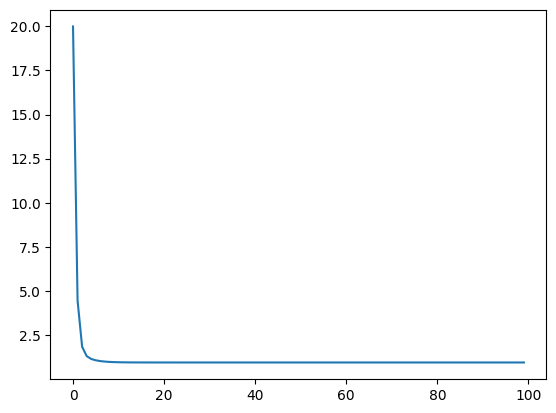

In [60]:
# model
model = torch.nn.Linear(1,1, bias = True)
my_optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

history=[]
lr=0.1
for epoch in range(100):
    Yhat = model(X)
    loss = loss_ftn(Yhat,Y)

    loss.backward()


    #w.data = w.data-lr*w.grad.data
    #b.data = b.data-lr*b.grad.data
    my_optimizer.step()

    # w.grad.data = None
    # b.grad.data = None
    my_optimizer.zero_grad()

    history.append(loss.item())


plt.plot(history)

### hw: Use trainloader and complete process of training

In [65]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
dataset = TensorDataset(X,Y)
trainloader=DataLoader(dataset = dataset, batch_size=5, shuffle=True)

In [ ]:
# model
'''
model = torch.nn.Linear(1,1, bias = True)
my_optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs=100
history=[]
n=len(X)


for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(  )
    loss = loss_ftn(   ,    )
    LOSS_sum =

    loss.backward()

    my_optimizer.step()
    my_optimizer.zero_grad()

  history.append(LOSS_sum.item()/n)
'''

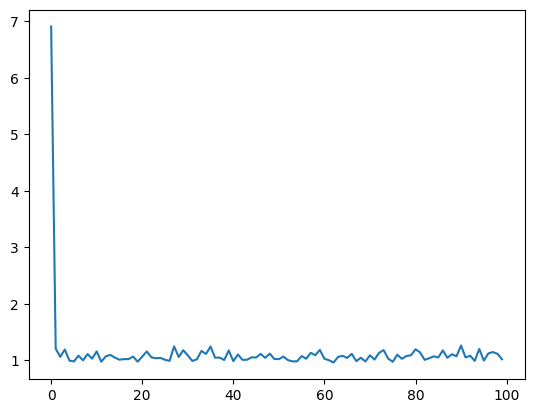

In [ ]:
plt.plot(history)

# predict yhat when x = 3.0

In [61]:
# m1
xxx = torch.tensor([[3.0]])
model(xxx)

tensor([[3.9623]], grad_fn=<AddmmBackward0>)

In [62]:
# without model

# step1. check model's parameter using model.state_dict()
W = model.weight
b = model.bias
xxx @ W + b

tensor([[3.9623]], grad_fn=<AddBackward0>)

# Loss: log-likehood function


```
def loss_ftn(yhat, y):
    return torch.mean( (y-yhat)**2)
```

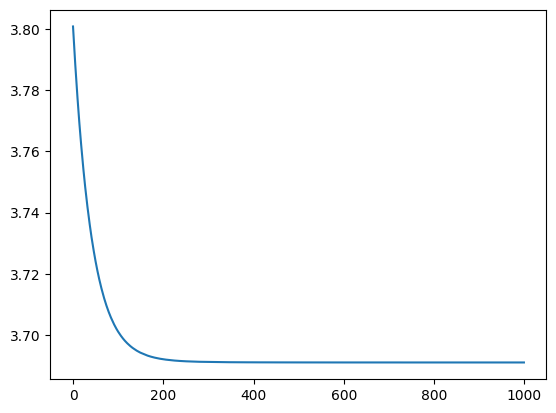

In [70]:
'''
sigma = torch.tensor(10.0)
def loss_ftn(yhat, y):
    return


model = torch.nn.Linear(1,1, bias = True)
my_optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs=1000
history=[]
n=len(X)


for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat =
    loss =
    LOSS_sum =

    # weight 미분값 계산
    loss

    # weight update
    my_optimizer.

    # weight grad 초기화
    my_optimizer.

  history.append(LOSS_sum.item()/n)

plt.plot(history)
'''

In [72]:
loss_ftn(model(X),Y) # AIC로 이용 가능

tensor(3.6910, grad_fn=<NegBackward0>)

In [73]:
Yhat = model(X)
torch.mean((Yhat-Y)**2) # 앞서 train_mse와 유사함


tensor(0.9534, grad_fn=<MeanBackward0>)

---

# Logistic regression

In [ ]:
'''
sigma = torch.tensor(10.0)
def loss_ftn(yhat, y):
    # log-likelihood when f(y) = p^y * (1-p)^(1-y)
    return


model = torch.nn.Linear(1,1, bias = True)
my_optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs=1000
history=[]
n=len(X)


for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat =
    loss =
    LOSS_sum =

    # weight 미분값 계산
    loss

    # weight update
    my_optimizer.

    # weight grad 초기화
    my_optimizer.

  history.append(LOSS_sum.item()/n)

plt.plot(history)
'''